# Data Preparation for Classifiers
## Step 1: Name location of classes
Select one folder that contains one subfolder for each class. Each subbolder contains CSV files. Every CSV file represents one item. Items are named after what they are ("artist - title (year).extension.csv"). Items are chacterized by feature magnitudes. We have extracted 21 features from every time frame of each audio file.

In [1]:
import os
import glob

measCsv=r'C:\python\gits\early-techno\example-data'
folds=glob.glob(str(measCsv+'\\*'))

## Step 2: List all features and select your preferred ones

In [3]:
# dictionary of all features:
features = {1: 'PhaseSpace',
            2: 'ChannelCorrelation',
            3: 'PeakMeter',
            4: 'RMS',
            5: 'CrestFactor',
            6: 'PhaseSpaceLow',
            7: 'ChannelCorrelationLow',
            8: 'PeakMeterLow',
            9: 'RMSLow',
            10: 'CrestFactorLow',
            11: 'PhaseSpaceMid',
            12: 'ChannelCorrelationMid',
            13: 'PeakMeterMid',
            14: 'RMSMid',
            15: 'CrestFactorMid',
            16: 'PhaseSpaceHigh',
            17: 'ChannelCorrelationHigh',
            18: 'PeakMeterHigh',
            19: 'RMSHigh',
            20: 'CrestFactorHigh',
            21: 'bpm'}

# selection of preferred features
nfeatures = {0: 1,
             1: 1,
             2: 3,
             3: 4,
             4: 5,
             5: 21
            }
# shall we take each feratures' 'mean', 'median', standard deviation ('std'), skewness ('skew'), or kurtosis ('kurt')?
what=['std',
      'median',
      'mean',
      'std',
      'skew',
      'kurt']
numfeatures = len(nfeatures)

## Step 3: Prepare the training data matrix

In [4]:
import numpy as np # for arrays
import pandas as pd # for importing csv files
from pathlib import Path

train_X = np.array([np.zeros(numfeatures)])
target = []
color_map = {}
classname = []

for cl, fold in enumerate(folds):
    files = glob.glob(str(fold+'\*.csv'))
    numfiles = len(files)
    lal1 = np.empty((numfiles, numfeatures))
    for j, f in enumerate(files):
        la = pd.read_csv(f, index_col=0)
        # print(f)
        classname.append(cl)
        for dt, i in enumerate(nfeatures):
            if what[dt]=='std':
                lal1[j][i-1] = la[features[nfeatures[i]]].std()
            elif what[dt]=='mean':
                lal1[j][i-1] = la[features[nfeatures[i]]].mean()
            elif what[dt]=='median':
                lal1[j][i-1] = la[features[nfeatures[i]]].median()
            elif what[dt]=='skew':
                lal1[j][i-1] = la[features[nfeatures[i]]].skew()
            elif what[dt]=='kurt':
                lal1[j][i-1] = la[features[nfeatures[i]]].kurtosis()
            #if STD[dt]:
                # calculate standard deviation of feature over time
            #    lal1[j][i-1] = la[features[nfeatures[i]]].std()
            #else:
                # calculate mean of features over time
                #lal1[j][i-1] = la[features[nfeatures[i]]].mean()#!?!median()

    train_X = np.concatenate((train_X, lal1))
    target = target + [(str(Path(fold).relative_to(measCsv)), i+1)
                       for i in range(0, len(lal1))]

    color_map[str(Path(fold).relative_to(measCsv))] = cl

train_X = train_X[1:]

# give the classes their names
labels=['Germany','USA']

## Step 4: Scale the data

In [6]:
from sklearn import preprocessing #für normierung

scaler = preprocessing.StandardScaler().fit(train_X) #skalieren die einzelen features auf Mean=0 und Std=1
lal = scaler.transform(train_X)

## Step 5: Train-Test-Split

In [11]:
from sklearn.model_selection import train_test_split# splits the feature matrix into training data of test_size a

y=classname#each row includes the class number
X=train_X# each row includes all attribute magnitudes of a single item
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

## Step 6: Train and validate a classifier

### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()#load an instance of the RF classifier
rf.fit(X_train, y_train)
print(f'Train Accuracy: {rf.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {rf.score(X_test, y_test):.3f}')

Train Accuracy: 1.000
Test Accuracy: 0.353


              precision    recall  f1-score   support

           0       0.31      1.00      0.48         5
           1       1.00      0.08      0.15        12

    accuracy                           0.35        17
   macro avg       0.66      0.54      0.32        17
weighted avg       0.80      0.35      0.25        17

Train Accuracy: 1.000
Test Accuracy: 0.353


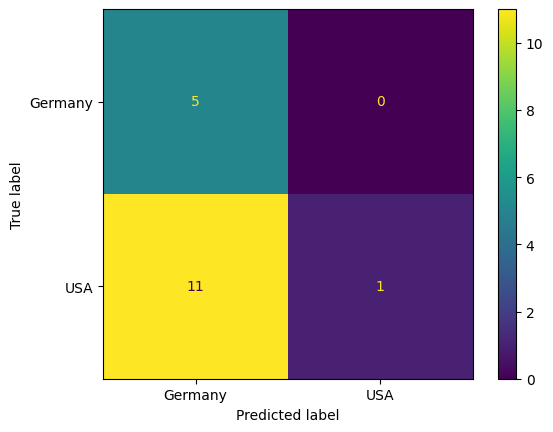

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_predict = rf.predict(X_test)
cmrf = confusion_matrix(y_test, rf_predict)
cmdrf = ConfusionMatrixDisplay(cmrf, display_labels=labels)
cmdrf.plot()
print(classification_report(y_test, rf_predict))
print(f'Train Accuracy: {rf.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {rf.score(X_test, y_test):.3f}')

### Support Vector Machine

In [15]:
from sklearn import svm

clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)
print(f'Train Accuracy: {clf.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {clf.score(X_test, y_test):.3f}')

Train Accuracy: 0.706
Test Accuracy: 0.294


              precision    recall  f1-score   support

           0       0.29      1.00      0.45         5
           1       0.00      0.00      0.00        12

    accuracy                           0.29        17
   macro avg       0.15      0.50      0.23        17
weighted avg       0.09      0.29      0.13        17

Train Accuracy: 0.706
Test Accuracy: 0.294


C:\Users\t_ziemer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\t_ziemer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\t_ziemer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

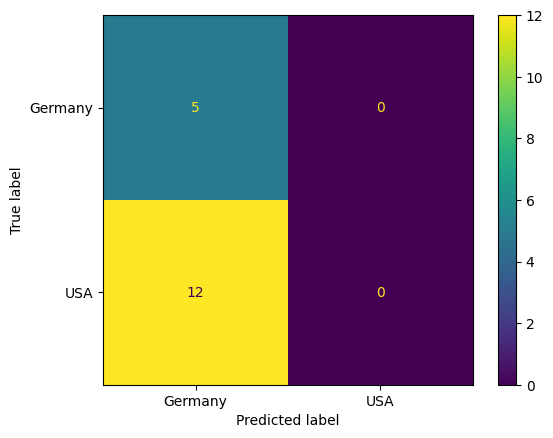

In [16]:
clf_predict = clf.predict(X_test)
cmclf = confusion_matrix(y_test, clf_predict)
cmdclf = ConfusionMatrixDisplay(cmclf, display_labels=labels)
cmdclf.plot()
print(classification_report(y_test, clf_predict))
print(f'Train Accuracy: {clf.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {clf.score(X_test, y_test):.3f}')

### Multi Layer Perceptron Neural Network

In [17]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)
print(f'Train Accuracy: {mlpc.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {mlpc.score(X_test, y_test):.3f}')

Train Accuracy: 0.824
Test Accuracy: 0.412


C:\Users\t_ziemer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.33      1.00      0.50         5
           1       1.00      0.17      0.29        12

    accuracy                           0.41        17
   macro avg       0.67      0.58      0.39        17
weighted avg       0.80      0.41      0.35        17

[[ 5  0]
 [10  2]]


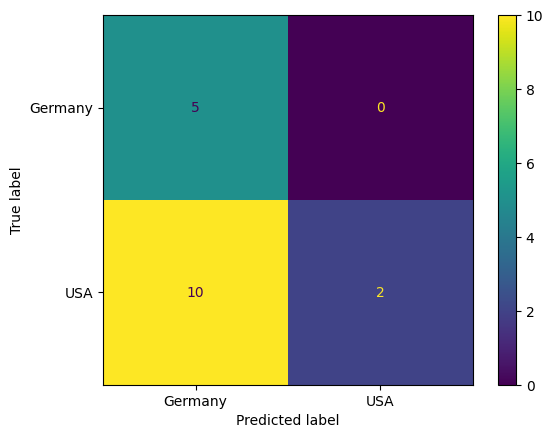

In [18]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))
cmmlp = confusion_matrix(y_test, pred_mlpc)
cmdmlp = ConfusionMatrixDisplay(cmmlp, display_labels=labels)
cmdmlp.plot()

### Convolutional Neural Network

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

num_classes=len(folds)# model needs to know the number of classes

num_features = len(nfeatures)# model needs to know the length of the input vectors. Here, the number of features.

# you have to build the network architecture:
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(num_features, 1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

C:\Users\t_ziemer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# you have to compile the model so that it runs faster
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_test_one_hot))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2941 - loss: 0.9694 - val_accuracy: 0.6471 - val_loss: 0.6793
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2941 - loss: 0.7296 - val_accuracy: 0.2941 - val_loss: 0.8608
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7059 - loss: 0.6132 - val_accuracy: 0.2941 - val_loss: 1.1009
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7059 - loss: 0.5950 - val_accuracy: 0.2941 - val_loss: 1.3295
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7059 - loss: 0.6251 - val_accuracy: 0.2941 - val_loss: 1.4959
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7059 - loss: 0.6596 - val_accuracy: 0.2941 - val_loss: 1.5876
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7059 - loss: 0.6810 - val_accuracy: 0.2941 - val_loss: 1.6106
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7059 - loss: 0.6859 - val_accuracy: 0.2941 - val_loss: 1.5778
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
              precision    recall  f1-score   support

           0       0.29      1.00      0.45         5
           1       0.00      0.00      0.00        12

    accuracy                           0.29        17
   macro avg       0.15      0.50      0.23        17
weighted avg       0.09      0.29      0.13        17



C:\Users\t_ziemer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\t_ziemer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\t_ziemer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

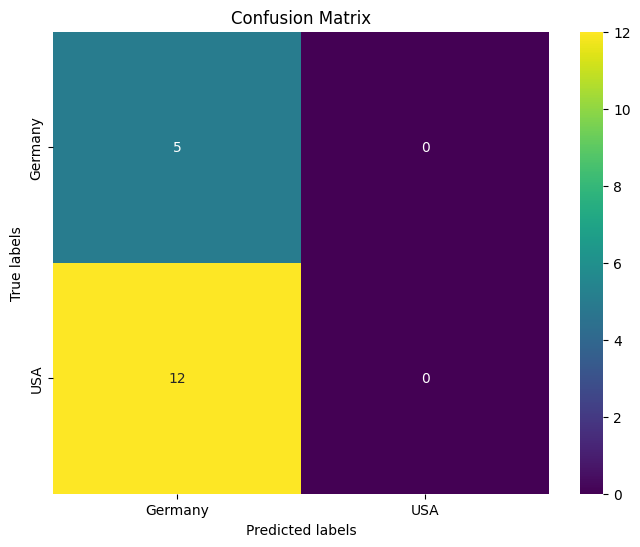

In [21]:
y_pred_test = model.predict(X_test)
y_pred_test_classes = y_pred_test.argmax(axis=1)

# Convert one-hot encoded y_true_test to class labels
y_true_test_classes = y_test_one_hot.argmax(axis=1)

# Display classification report
print(classification_report(y_true_test_classes, y_pred_test_classes))

conf_matrix = confusion_matrix(y_true_test_classes, y_pred_test_classes)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()